In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [56]:
x, y = make_blobs(
    n_samples=133, centers=2, n_features=2, random_state=0, cluster_std=0.7
)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

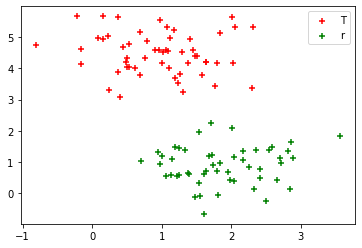

In [57]:
plt.scatter(
    x_train[y_train == 0, 0], x_train[y_train == 0, 1], c="r", marker="+", label="0"
)
plt.scatter(
    x_train[y_train == 1, 0], x_train[y_train == 1, 1], c="g", marker="+", label="1"
)
plt.legend("Train data: class 0, Train data: class 1")
plt.show()

In [58]:
reg_param = 1
# svc = svm.SVC(kernel='linear', C=reg_param)
# svc = svm.SVC(kernel='rbf', C=reg_param, gamma=.7)
svc = svm.SVC(kernel="poly", C=reg_param, degree=5)

svc.fit(x_train, y_train)
predict = svc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, predict))
print("Confusion matrix: \n", confusion_matrix(y_test, predict))

Accuracy:  1.0
Confusion matrix: 
 [[12  0]
 [ 0 15]]


/tmp/ipykernel_12213/2031195699.py:24: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contour(X, Y, Z, camp=plt.cm.coolwarm, alpha=.3)


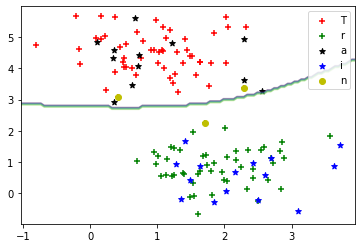

In [59]:
plt.scatter(
    x_train[y_train == 0, 0], x_train[y_train == 0, 1], c="r", marker="+", label="0"
)
plt.scatter(
    x_train[y_train == 1, 0], x_train[y_train == 1, 1], c="g", marker="+", label="1"
)

plt.scatter(
    x_test[y_test == 0, 0], x_test[y_test == 0, 1], c="k", marker="*", label="0"
)
plt.scatter(
    x_test[y_test == 1, 0], x_test[y_test == 1, 1], c="b", marker="*", label="1"
)

support_vectors = svc.support_vectors_
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    c="y",
    marker="o",
    label="Support vectors",
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# w = svc.coef_[0]
# X = np.linspace(xlim[0], xlim[1])
# Y = -w[0] / w[1] * X - (svc.intercept_[0] / w[1])
# plt.plot(X, Y, lw=3)


X, Y = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100)
)
plt_data = np.transpose([X.ravel(), Y.ravel()])
Z = svc.predict(plt_data)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, camp=plt.cm.coolwarm, alpha=0.3)

plt.legend(
    "Train data: class 0, Train data: class 1, Test data: class 0, Test data: class 1, Support vectors"
)
plt.show()